In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

sys.path.append('/home/tpopova/prj/PB_SCF/08_2D_pore/py_files')
sys.path.append('/home/tpopova/prj/PB_SCF/01_dendrone_pore/py_files')

import config_loader
from out_reader import out_reader, get_profiles_by_y_or_x
from dendrons_pore import dendrons_pore

INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml


# График сравнения теории и намикса: электростатический потенциал и профиль плотности полимера

Параметры

In [2]:
N = 50
S = 50
D = 60
valence = -0.5

# Для 2D
L_pore = [40, 60, 80, 120, 160]
space = 15
L_wall = 15

Cs = 0.005
chi_solv = 0.5
chi_surf = 0

# Теория

In [3]:
N, n, theta, H, r_in_dendrons, r_out_dendrons, psi_in_dendrons, psi_out_dendrons, c_pol_dendrons, _ = dendrons_pore(
    Cs = Cs,
    
    #параметры щетки
    alpha = abs(valence),
    S = S,
    
    #параметры поры
    D = D,
    N_opt = N,
    
)

print(N, theta, H)

50 376.99111843077515 [23.71773632]


# Namics 2D

# Расчет

In [4]:
df_dict = {}
# Процесс обновления конфигурации и получения данных для каждого L_pore
for l in L_pore:
    # Загрузить конфигурацию
    config = config_loader.load_config()

    # Обновить параметры
    params_to_update = {
        "Cs": Cs,
        "D": D,
        "L_pore": l,
        "L_wall": L_wall,
        "N": N,
        "S": S,
        "chi_solv": chi_solv,
        "chi_surf": chi_surf,
        "max_val": 0.1,
        "min_val": 0.1,
        "output_dir": "2D_pore_in_files_fig2",
        "range_param": 'Cs',
        "space": space,
        "target_dir": "/home/tpopova/prj/PB_SCF/08_2D_pore/scf_templates",
        "valence": valence,
    }

    for param, value in params_to_update.items():
        config = config_loader.update_config_param(config, param, value)

    # Сохранить обновлённую конфигурацию
    config_loader.save_config(config)
    
    # Чтение данных из конфигурации
    df, x, y, psi, phi_brush, phi_end_brush = out_reader()
    df_dict[l] = df

INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Обновление параметра Cs на 0.005
INFO:root:Обновление параметра D на 60
INFO:root:Обновление параметра L_pore на 40
INFO:root:Обновление параметра L_wall на 15
INFO:root:Обновление параметра N на 50
INFO:root:Обновление параметра S на 50
INFO:root:Обновление параметра chi_solv на 0.5
INFO:root:Обновление параметра chi_surf на 0
INFO:root:Обновление параметра max_val на 0.1
INFO:root:Обновление параметра min_val на 0.1
INFO:root:Обновление параметра output_dir на 2D_pore_in_files_fig2
INFO:root:Обновление параметра range_param на Cs
INFO:root:Обновление параметра space на 15
INFO:root:Обновление параметра target_dir на /home/tpopova/prj/PB_SCF/08_2D_pore/scf_templates
INFO:root:Обновление параметра valence на -0.5
INFO:root:Конфигурация успешно сохранена в /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_S

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
DIIS has been notified
Your guess = 3.918856e+00 
iterations = 1 g = 3.529209e+00 
iterations = 2 g = 3.194609e+00 
iterations = 3 g = 2.074679e+00 
iterations = 4 g = 2.176064e+00 
iterations = 5 g = 1.985357e+00 
iterations = 6 g = 1.782277e+00 
iterations = 7 g = 1.768189e+00 
iterations = 8 g = 1.557566e+00 
iterations = 9 g = 1.454629e+00 
iterations = 10 g = 1.335715e+00 
iterations = 11 g = 1.419892e+00 
iterations = 12 g = 1.335520e+00 
iterations = 13 g = 1.158695e+00 
iterations = 14 g = 1.131732e+00 
iterations = 15 g = 1.096244e+00 
iterations = 16 g = 9.860484e-01 
iterations = 17 g = 1.012462e+00 
iterations = 18 g = 8.987144e-01 
iterations = 19 g = 8.658850e-01 
iterations = 20 g = 8.538355e-01 
iterations = 21 g = 8.567785e-01 
iterations = 22 g = 8.

INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Обновление параметра Cs на 0.005
INFO:root:Обновление параметра D на 60
INFO:root:Обновление параметра L_pore на 60
INFO:root:Обновление параметра L_wall на 15
INFO:root:Обновление параметра N на 50
INFO:root:Обновление параметра S на 50
INFO:root:Обновление параметра chi_solv на 0.5
INFO:root:Обновление параметра chi_surf на 0
INFO:root:Обновление параметра max_val на 0.1
INFO:root:Обновление параметра min_val на 0.1
INFO:root:Обновление параметра output_dir на 2D_pore_in_files_fig2
INFO:root:Обновление параметра range_param на Cs
INFO:root:Обновление параметра space на 15
INFO:root:Обновление параметра target_dir на /home/tpopova/prj/PB_SCF/08_2D_pore/scf_templates
INFO:root:Обновление параметра valence на -0.5
INFO:root:Конфигурация успешно сохранена в /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_S

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
DIIS has been notified
Your guess = 4.827969e+00 
iterations = 1 g = 4.357375e+00 
iterations = 2 g = 3.950661e+00 
iterations = 3 g = 2.556244e+00 
iterations = 4 g = 2.704973e+00 
iterations = 5 g = 2.445824e+00 
iterations = 6 g = 2.129135e+00 
iterations = 7 g = 2.111751e+00 
iterations = 8 g = 1.912414e+00 
iterations = 9 g = 1.857481e+00 
iterations = 10 g = 1.898973e+00 
iterations = 11 g = 1.710572e+00 
iterations = 12 g = 1.777529e+00 
iterations = 13 g = 1.681384e+00 
iterations = 14 g = 1.497274e+00 
iterations = 15 g = 1.523858e+00 
iterations = 16 g = 1.311992e+00 
iterations = 17 g = 1.261578e+00 
iterations = 18 g = 1.247546e+00 
iterations = 19 g = 1.152392e+00 
iterations = 20 g = 1.125771e+00 
iterations = 21 g = 1.085395e+00 
iterations = 22 g = 1.

INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Обновление параметра Cs на 0.005
INFO:root:Обновление параметра D на 60
INFO:root:Обновление параметра L_pore на 80
INFO:root:Обновление параметра L_wall на 15
INFO:root:Обновление параметра N на 50
INFO:root:Обновление параметра S на 50
INFO:root:Обновление параметра chi_solv на 0.5
INFO:root:Обновление параметра chi_surf на 0
INFO:root:Обновление параметра max_val на 0.1
INFO:root:Обновление параметра min_val на 0.1
INFO:root:Обновление параметра output_dir на 2D_pore_in_files_fig2
INFO:root:Обновление параметра range_param на Cs
INFO:root:Обновление параметра space на 15
INFO:root:Обновление параметра target_dir на /home/tpopova/prj/PB_SCF/08_2D_pore/scf_templates
INFO:root:Обновление параметра valence на -0.5
INFO:root:Конфигурация успешно сохранена в /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_S

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
DIIS has been notified
Your guess = 5.583468e+00 
iterations = 1 g = 5.042673e+00 
iterations = 2 g = 4.573702e+00 
iterations = 3 g = 2.945620e+00 
iterations = 4 g = 3.131900e+00 
iterations = 5 g = 2.812872e+00 
iterations = 6 g = 2.405717e+00 
iterations = 7 g = 2.374591e+00 
iterations = 8 g = 2.164033e+00 
iterations = 9 g = 2.136951e+00 
iterations = 10 g = 2.484594e+00 
iterations = 11 g = 2.173730e+00 
iterations = 12 g = 2.198298e+00 
iterations = 13 g = 2.187417e+00 
iterations = 14 g = 1.908516e+00 
iterations = 15 g = 1.993998e+00 
iterations = 16 g = 1.722893e+00 
iterations = 17 g = 1.555710e+00 
iterations = 18 g = 1.460181e+00 
iterations = 19 g = 1.450241e+00 
iterations = 20 g = 1.283929e+00 
iterations = 21 g = 1.304219e+00 
iterations = 22 g = 1.

INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Обновление параметра Cs на 0.005
INFO:root:Обновление параметра D на 60
INFO:root:Обновление параметра L_pore на 120
INFO:root:Обновление параметра L_wall на 15
INFO:root:Обновление параметра N на 50
INFO:root:Обновление параметра S на 50
INFO:root:Обновление параметра chi_solv на 0.5
INFO:root:Обновление параметра chi_surf на 0
INFO:root:Обновление параметра max_val на 0.1
INFO:root:Обновление параметра min_val на 0.1
INFO:root:Обновление параметра output_dir на 2D_pore_in_files_fig2
INFO:root:Обновление параметра range_param на Cs
INFO:root:Обновление параметра space на 15
INFO:root:Обновление параметра target_dir на /home/tpopova/prj/PB_SCF/08_2D_pore/scf_templates
INFO:root:Обновление параметра valence на -0.5
INFO:root:Конфигурация успешно сохранена в /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
DIIS has been notified
Your guess = 6.862068e+00 
iterations = 1 g = 6.205113e+00 
iterations = 2 g = 5.634171e+00 
iterations = 3 g = 3.646684e+00 
iterations = 4 g = 3.921088e+00 
iterations = 5 g = 3.532160e+00 
iterations = 6 g = 3.041513e+00 
iterations = 7 g = 3.023589e+00 
iterations = 8 g = 2.752788e+00 
iterations = 9 g = 2.675771e+00 
iterations = 10 g = 3.281176e+00 
iterations = 11 g = 2.927793e+00 
iterations = 12 g = 2.828329e+00 
iterations = 13 g = 2.821846e+00 
iterations = 14 g = 2.723221e+00 
iterations = 15 g = 2.894723e+00 
iterations = 16 g = 2.681957e+00 
iterations = 17 g = 2.283697e+00 
iterations = 18 g = 2.266860e+00 
iterations = 19 g = 1.851793e+00 
iterations = 20 g = 1.666245e+00 
iterations = 21 g = 1.642266e+00 
iterations = 22 g = 1.

INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Обновление параметра Cs на 0.005
INFO:root:Обновление параметра D на 60
INFO:root:Обновление параметра L_pore на 160
INFO:root:Обновление параметра L_wall на 15
INFO:root:Обновление параметра N на 50
INFO:root:Обновление параметра S на 50
INFO:root:Обновление параметра chi_solv на 0.5
INFO:root:Обновление параметра chi_surf на 0
INFO:root:Обновление параметра max_val на 0.1
INFO:root:Обновление параметра min_val на 0.1
INFO:root:Обновление параметра output_dir на 2D_pore_in_files_fig2
INFO:root:Обновление параметра range_param на Cs
INFO:root:Обновление параметра space на 15
INFO:root:Обновление параметра target_dir на /home/tpopova/prj/PB_SCF/08_2D_pore/scf_templates
INFO:root:Обновление параметра valence на -0.5
INFO:root:Конфигурация успешно сохранена в /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
DIIS has been notified
Your guess = 7.937306e+00 
iterations = 1 g = 7.181803e+00 
iterations = 2 g = 6.524493e+00 
iterations = 3 g = 4.233377e+00 
iterations = 4 g = 4.581258e+00 
iterations = 5 g = 4.131978e+00 
iterations = 6 g = 3.574775e+00 
iterations = 7 g = 3.573163e+00 
iterations = 8 g = 3.248394e+00 
iterations = 9 g = 3.093035e+00 
iterations = 10 g = 3.854142e+00 
iterations = 11 g = 3.489628e+00 
iterations = 12 g = 3.358365e+00 
iterations = 13 g = 3.370402e+00 
iterations = 14 g = 3.359549e+00 
iterations = 15 g = 3.568136e+00 
iterations = 16 g = 3.377737e+00 
iterations = 17 g = 2.909800e+00 
iterations = 18 g = 2.855577e+00 
iterations = 19 g = 2.202823e+00 
iterations = 20 g = 2.216545e+00 
iterations = 21 g = 2.035835e+00 
iterations = 22 g = 2.

# Построение графика

In [5]:
# Итерация по данным для построения графиков
psi_nam_dict = {}
phi_nam_dict = {}

for l, df in df_dict.items():
    y_fraction = [0]  # Используем долю от центра для y

    # Получение профилей для каждого df
    psi_nam = get_profiles_by_y_or_x(df, y_fraction, profiles_name='sys_noname_psi', groupby='y', coord='x', use_fraction=True)
    phi_nam = get_profiles_by_y_or_x(df, y_fraction, profiles_name='combined_phi', groupby='y', coord='x', use_fraction=True)

    psi_nam_dict[l] = psi_nam
    phi_nam_dict[l] = phi_nam

<>:18: SyntaxWarning: invalid escape sequence '\ '
<>:18: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipykernel_30733/2117449277.py:18: SyntaxWarning: invalid escape sequence '\ '
  plt.title("$Профили \ \\psi \ vs \ x \ для \ выбранных \ y$")


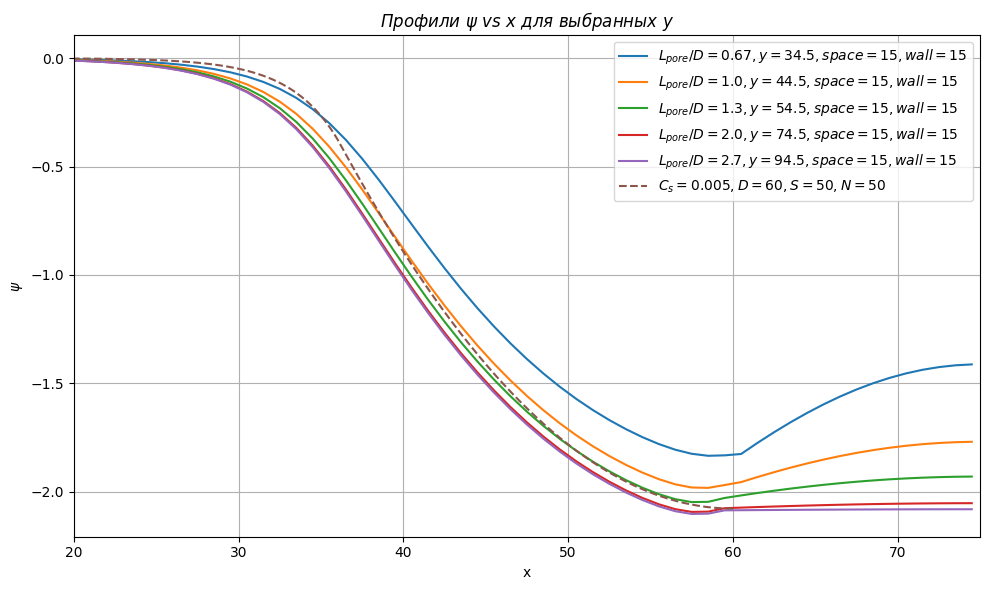

In [10]:
# Построение графиков
plt.figure(figsize=(10, 6))

for l, psi_nam in psi_nam_dict.items():
    for y_val, data in psi_nam.items():
        plt.plot(data['x'], data['sys_noname_psi'], label=f"$L_{{pore}}/D = {l/D:.2}, y = {y_val}, space = {space}, wall = {L_wall}$")
        
plt.plot(np.hstack((r_in_dendrons, r_out_dendrons)), 
         np.hstack((psi_in_dendrons, psi_out_dendrons)), 
         linestyle='--', 
         label=f'$C_s = {Cs}, D = {D}, S = {S}, N = {N}$')

plt.xlim(20, 75)

# Подписи и оформление графика
plt.xlabel("x")
plt.ylabel("$\\psi$")
plt.title("$Профили \ \\psi \ vs \ x \ для \ выбранных \ y$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Электростатический потенциал

<>:16: SyntaxWarning: invalid escape sequence '\ '
<>:16: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipykernel_30733/1927802488.py:16: SyntaxWarning: invalid escape sequence '\ '
  plt.title("$Профили \ \\phi \ vs \ x \ для \ выбранных \ y$")


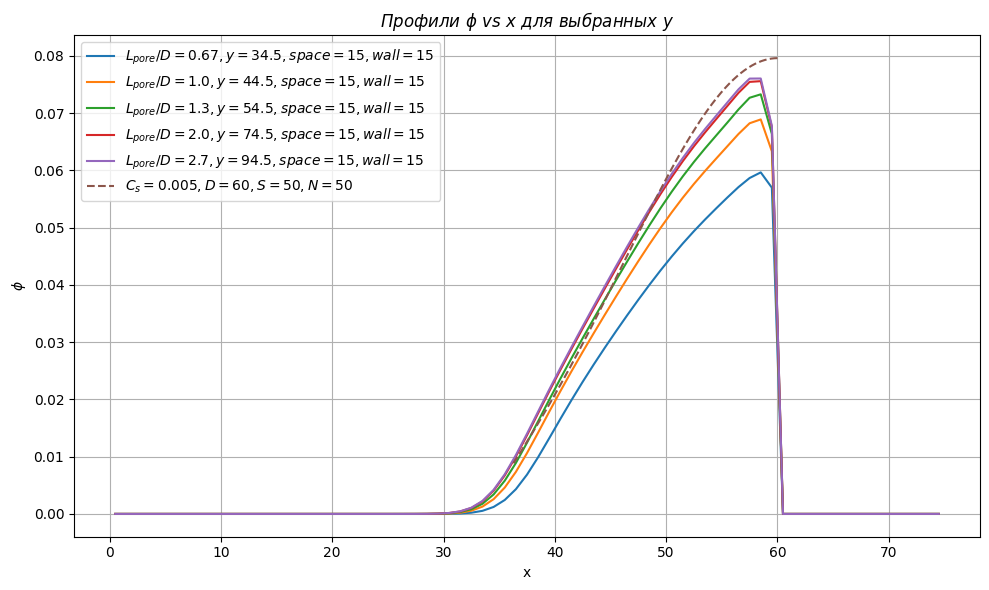

In [12]:
# Построение графиков
plt.figure(figsize=(10, 6))

for l, phi_nam in phi_nam_dict.items():
    for y_val, data in phi_nam.items():
        plt.plot(data['x'], data['combined_phi'], label=f"$L_{{pore}}/D = {l/D:.2}, y = {y_val}, space = {space}, wall = {L_wall}$")
        
plt.plot(r_in_dendrons, 
         c_pol_dendrons, 
         linestyle='--', 
         label=f'$C_s = {Cs:.2}, D = {D}, S = {S}, N = {N}$')

# Подписи и оформление графика
plt.xlabel("x")
plt.ylabel("$\\phi$")
plt.title("$Профили \ \\phi \ vs \ x \ для \ выбранных \ y$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()